In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [3]:
data = pd.read_csv('../data/creditcard.csv')

In [4]:
data.columns, data.shape

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'), (284807, 31))

In [5]:
data.sample(n=3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104195,68954.0,-6.042554,-2.932829,-1.731639,0.819556,-3.739305,0.749520,1.590759,-1.954896,-1.046441,...,0.318915,-1.288651,-3.142770,1.046294,-0.490361,1.216067,1.027895,-2.186144,833.47,0
61532,49880.0,-0.943412,-0.184294,2.351897,1.679541,-1.511812,1.791964,-0.159065,0.671600,1.222904,...,0.082139,0.788482,0.144127,0.028934,-0.535288,-0.163712,0.460087,0.220483,191.48,0
21615,31767.0,-1.139164,1.132194,1.514213,-1.178960,-0.543484,-0.944796,0.231654,0.411327,-0.248846,...,0.045632,0.065280,0.081683,0.655150,-0.452448,0.703637,0.019069,0.111934,1.79,0


In [6]:
data.Time.min(), data.Time.max()

(0.0, 172792.0)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data = data.sort_values(by='Time')

In [9]:
tmp = np.array(data.Amount)

from sklearn.preprocessing import StandardScaler

tmp = StandardScaler().fit_transform(tmp.reshape(-1,1))

In [10]:
data['Amount']=tmp

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
l = int(data.shape[0]*0.8)

train_data = data[:l]
test_data = data[l:]

In [13]:
train_data.shape, test_data.shape

((227845, 31), (56962, 31))

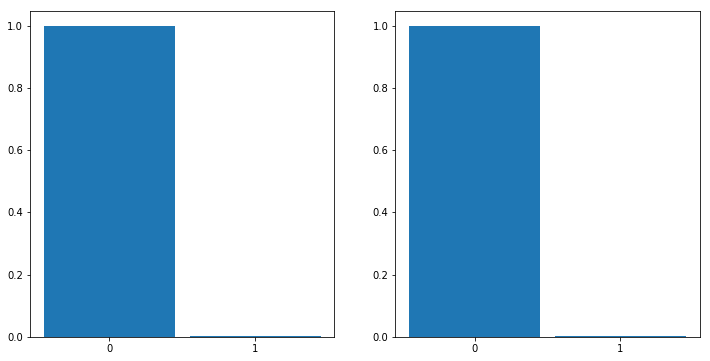

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(train_data.Class,normed=True,bins=[0,1,2],rwidth=0.9)
plt.xticks([0.5,1.5],[0,1])

plt.subplot(1,2,2)
plt.hist(test_data.Class,normed=True,bins=[0,1,2],rwidth=0.9)
plt.xticks([0.5,1.5],[0,1])

plt.show()

In [15]:
train_data.Class.describe()

count    227845.000000
mean          0.001830
std           0.042742
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [16]:
test_data.Class.describe()

count    56962.000000
mean         0.001317
std          0.036262
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [17]:
print ('TRAIN DATA: \n{}\n\nTEST DATA: \n{}'.format(train_data.Class.value_counts(), test_data.Class.value_counts()))

TRAIN DATA: 
0    227428
1       417
Name: Class, dtype: int64

TEST DATA: 
0    56887
1       75
Name: Class, dtype: int64


In [18]:
print ('Almost same % of Class 1 in train and test data:\n\n{}\n{}' .format(417/227845,  75/56962))

Almost same % of Class 1 in train and test data:

0.001830191577607584
0.001316667251852112


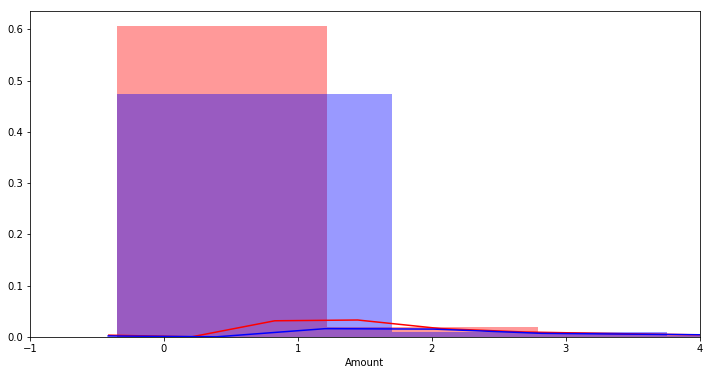

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(train_data.Amount,color='r')
sns.distplot(test_data.Amount,color='b')
plt.xlim(-1,4)
plt.show()

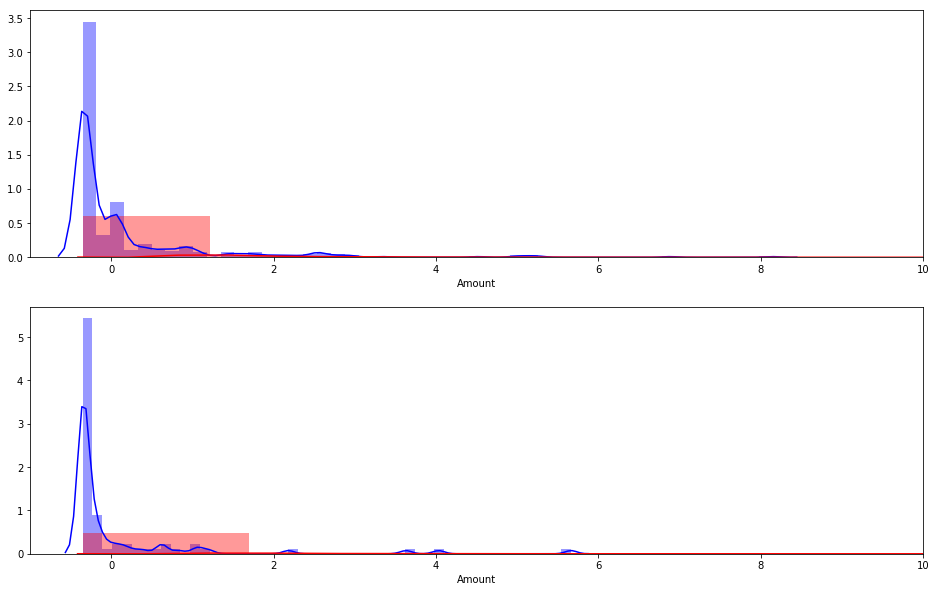

In [33]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
sns.distplot(train_data[train_data.Class == 1].Amount,color='b')
sns.distplot(train_data[train_data.Class == 0].Amount, color='r')
plt.xlim(-1,10)

plt.subplot(2,1,2)
sns.distplot(test_data[test_data.Class == 1].Amount,color='b')
sns.distplot(test_data[test_data.Class == 0].Amount, color='r')
plt.xlim(-1,10)

plt.show()

In [21]:
train_data = train_data.drop(labels=['Time'],axis=1)

test_data = test_data.drop(labels=['Time'],axis=1)

In [35]:
train_data.columns
anon_features = train_data.ix[]

NameError: name 'anon' is not defined

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

In [23]:
# Building model blindfolded
lr = LogisticRegression(C=0.01,class_weight='balanced',verbose=1,penalty='l2')
lr.fit(train_data.drop(labels=['Class'],axis=1),train_data.Class)
y_pred = lr.predict(test_data.drop(labels=['Class'],axis=1))

[LibLinear]

In [24]:
prec_rec = precision_recall_fscore_support(test_data.Class,y_pred) 
print ('Precision: {}\nRecall: {}'.format(prec_rec[0],prec_rec[1]))
print ('AUROC: ',roc_auc_score(test_data.Class,y_pred))

Precision: [ 0.99987363  0.04333971]
Recall: [ 0.97361436  0.90666667]
AUROC:  0.940140512478


In [25]:
probabilty = lr.predict_proba(test_data.drop(labels=['Class'],axis=1))

In [26]:
probabilty

array([[  9.38908778e-01,   6.10912220e-02],
       [  9.15102750e-01,   8.48972505e-02],
       [  9.99142365e-01,   8.57635017e-04],
       ..., 
       [  9.17081727e-01,   8.29182730e-02],
       [  9.72757878e-01,   2.72421219e-02],
       [  9.06997017e-01,   9.30029830e-02]])

In [27]:
import numpy
rnge = numpy.arange(0,1.1,0.1)
for i in rnge:
    res = []
    for j in range(probabilty.shape[0]):
        if(probabilty[j][1]>=i):
            res.append(1)
        else:
            res.append(0)
    
    prec_rec = precision_recall_fscore_support(test_data.Class.tolist(),res) 
    print ('Threshold: ',i)
    print ('Precision: {}\nRecall: {}'.format(prec_rec[0],prec_rec[1]))
    print ('AUROC: ',roc_auc_score(test_data.Class.tolist(),res))
    print ('--------------------------')

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Threshold:  0.0
Precision: [ 0.          0.00131667]
Recall: [ 0.  1.]
AUROC:  0.5
--------------------------
Threshold:  0.1
Precision: [ 0.99997768  0.00608203]
Recall: [ 0.78742068  0.98666667]
AUROC:  0.887043671372
--------------------------
Threshold:  0.2
Precision: [ 0.99990151  0.01130308]
Recall: [ 0.89236557  0.93333333]
AUROC:  0.912849450079
--------------------------
Threshold:  0.3
Precision: [ 0.99990622  0.01920439]
Recall: [ 0.93715612  0.93333333]
AUROC:  0.935244724923
--------------------------
Threshold:  0.4
Precision: [ 0.99989025  0.03010471]
Recall: [ 0.96092253  0.92      ]
AUROC:  0.940461265315
--------------------------
Threshold:  0.5
Precision: [ 0.99987363  0.04333971]
Recall: [ 0.97361436  0.90666667]
AUROC:  0.940140512478
--------------------------
Threshold:  0.6
Precision: [ 0.99983916  0.06560636]
Recall: [ 0.98347601  0.88      ]
AUROC:  0.931738006926
--------------------------
Threshold:  0.7
Precision: [ 0.9998226  0.1097973]
Recall: [ 0.99073

In [28]:
import numpy
rnge = numpy.arange(.9,1.01,0.01)
for i in rnge:
    res = []
    for j in range(probabilty.shape[0]):
        if(probabilty[j][1]>=i):
            res.append(1)
        else:
            res.append(0)
    
    prec_rec = precision_recall_fscore_support(test_data.Class.tolist(),res) 
    print ('Threshold: ',i)
    print ('Precision: {}\nRecall: {}'.format(prec_rec[0],prec_rec[1]))
    print ('AUROC: ',roc_auc_score(test_data.Class.tolist(),res))
    print ('--------------------------')

Threshold:  0.9
Precision: [ 0.99980612  0.28193833]
Recall: [ 0.99713467  0.85333333]
AUROC:  0.92523400191
--------------------------
Threshold:  0.91
Precision: [ 0.99977096  0.30392157]
Recall: [ 0.99750382  0.82666667]
AUROC:  0.912085245018
--------------------------
Threshold:  0.92
Precision: [ 0.99977103  0.3315508 ]
Recall: [ 0.99780266  0.82666667]
AUROC:  0.912234664042
--------------------------
Threshold:  0.93
Precision: [ 0.99977107  0.35428571]
Recall: [ 0.99801361  0.82666667]
AUROC:  0.912340136294
--------------------------
Threshold:  0.94
Precision: [ 0.99977112  0.37804878]
Recall: [ 0.99820697  0.82666667]
AUROC:  0.912436819191
--------------------------
Threshold:  0.95
Precision: [ 0.99975357  0.40397351]
Recall: [ 0.99841792  0.81333333]
AUROC:  0.905875624777
--------------------------
Threshold:  0.96
Precision: [ 0.9997536   0.42361111]
Recall: [ 0.99854097  0.81333333]
AUROC:  0.905937150257
--------------------------
Threshold:  0.97
Precision: [ 0.9997

In [29]:
import numpy
rnge = numpy.arange(.99,1.001,0.001)
for i in rnge:
    res = []
    for j in range(probabilty.shape[0]):
        if(probabilty[j][1]>=i):
            res.append(1)
        else:
            res.append(0)
    
    prec_rec = precision_recall_fscore_support(test_data.Class.tolist(),res) 
    print ('Threshold: ',i)
    print ('Precision: {}\nRecall: {}'.format(prec_rec[0],prec_rec[1]))
    print ('AUROC: ',roc_auc_score(test_data.Class.tolist(),res))
    print ('--------------------------')

Threshold:  0.99
Precision: [ 0.99971862  0.5959596 ]
Recall: [ 0.99929685  0.78666667]
AUROC:  0.89298175916
--------------------------
Threshold:  0.991
Precision: [ 0.99970108  0.63736264]
Recall: [ 0.9994199   0.77333333]
AUROC:  0.886376617974
--------------------------
Threshold:  0.992
Precision: [ 0.99970108  0.64444444]
Recall: [ 0.99943748  0.77333333]
AUROC:  0.886385407328
--------------------------
Threshold:  0.993
Precision: [ 0.99970109  0.65168539]
Recall: [ 0.99945506  0.77333333]
AUROC:  0.886394196682
--------------------------
Threshold:  0.994
Precision: [ 0.99970109  0.65909091]
Recall: [ 0.99947264  0.77333333]
AUROC:  0.886402986037
--------------------------
Threshold:  0.995
Precision: [ 0.9997011   0.66666667]
Recall: [ 0.99949022  0.77333333]
AUROC:  0.886411775391
--------------------------
Threshold:  0.996
Precision: [ 0.99970111  0.69047619]
Recall: [ 0.99954295  0.77333333]
AUROC:  0.886438143454
--------------------------
Threshold:  0.997
Precision: 